In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook as tqdm

In [2]:
# load daata
df = pd.read_csv('data.csv')
df.head(3)

,match_id,duration,win_team,score_r,score_d,skill,w1,w2,w3,w4,w5,l1,l2,l3,l4,l5
0,6374093605,3205,0,44,35,NaN,9,71,50,22,46,119,83,21,99,1
1,6374093612,2671,0,47,26,NaN,40,75,22,99,42,105,52,44,11,35
2,6374093615,2172,0,66,40,NaN,84,85,70,10,136,121,120,29,48,101


In [3]:
# Formula to replace unnecessary texts
def replace_text(to_replace,old_text_list,new_text):
    for old_text in old_text_list:
        to_replace = to_replace.replace(old_text,new_text)
    return to_replace

In [4]:
# Hero stat lookup formula
df_heroes = pd.read_csv('hero_stats.csv')[['hero_id','localized_name','roles']]
def herostat(ids,data):
    herostat = {k:v for k,v in zip(df_heroes.hero_id, df_heroes[data])}
    return [herostat[i] for i in ids]

# Make a list of all unique heroes
unique_role = list(np.unique(replace_text(','.join(df_heroes.roles),['[',']','"',"'",' '],'').split(',')))

# Assign primary role types
for r in range(df_heroes.shape[0]):
    df_heroes.loc[r,'roles_list'] = replace_text( ''.join(df_heroes.loc[r,'roles']), ['[',']','"',"'",' '], '').split(',')[0]

# Assign codified primary hero role
for role_type in unique_role:
    df_heroes[role_type] = df_heroes['roles_list'].str.count(role_type)
df_heroes.head(3)

,hero_id,localized_name,roles,roles_list,Carry,Disabler,Durable,Escape,Initiator,Jungler,Nuker,Pusher,Support
0,1,Anti-Mage,"['Carry', 'Escape', 'Nuker']",Carry,1,0,0,0,0,0,0,0,0
1,2,Axe,"['Initiator', 'Durable', 'Disabler', 'Jungler'...",Initiator,0,0,0,0,1,0,0,0,0
2,3,Bane,"['Support', 'Disabler', 'Nuker', 'Durable']",Support,0,0,0,0,0,0,0,0,1


In [5]:
# Include winning team's primary hero roles
df['roles_primary'] = ''
for r in range(df.shape[0]):
    # Create a list of dictionaries listing hero names and roles
    role_list = []
    for h in range(6,11):
        hero      = ''.join(herostat([df.iloc[r,h]],'localized_name')) # pull hero name - str
        roles     = replace_text( ','.join(herostat([df.iloc[r,h]],'roles')), ['[',']','"',"'",' '], '').split(',') # pull hero roles - list
        role_dict = {'hero':hero, 'roles':roles }
        role_list.append(role_dict)
    
    # Create an array with all primary roles of each hero
    primary_role_list = []
    for i in range(0,5):
        primary_role_list.append(str(role_list[i]['roles'][0]))
    df.loc[r,'roles_primary'] = str(primary_role_list)
df.head(3)

,match_id,duration,win_team,score_r,score_d,skill,w1,w2,w3,w4,w5,l1,l2,l3,l4,l5,roles_primary
0,6374093605,3205,0,44,35,NaN,9,71,50,22,46,119,83,21,99,1,"['Carry', 'Carry', 'Support', 'Nuker', 'Carry']"
1,6374093612,2671,0,47,26,NaN,40,75,22,99,42,105,52,44,11,35,"['Support', 'Carry', 'Nuker', 'Carry', 'Carry']"
2,6374093615,2172,0,66,40,NaN,84,85,70,10,136,121,120,29,48,101,"['Support', 'Support', 'Carry', 'Carry', 'Supp..."


In [6]:
# Include losing team's primary hero roles
df['roles_primary_l'] = ''
for r in range(df.shape[0]):
    # Create a list of dictionaries listing hero names and roles
    role_list = []
    for h in range(11,16):
        hero      = ''.join(herostat([df.iloc[r,h]],'localized_name')) # pull hero name - str
        roles     = replace_text( ','.join(herostat([df.iloc[r,h]],'roles')), ['[',']','"',"'",' '], '').split(',') # pull hero roles - list
        role_dict = {'hero':hero, 'roles':roles }
        role_list.append(role_dict)
    
    # Create an array with all primary roles of each hero
    primary_role_list = []
    for i in range(0,5):
        primary_role_list.append(str(role_list[i]['roles'][0]))
    df.loc[r,'roles_primary_l'] = str(primary_role_list)
df.head(3)

,match_id,duration,win_team,score_r,score_d,skill,w1,w2,w3,w4,w5,l1,l2,l3,l4,l5,roles_primary,roles_primary_l
0,6374093605,3205,0,44,35,NaN,9,71,50,22,46,119,83,21,99,1,"['Carry', 'Carry', 'Support', 'Nuker', 'Carry']","['Support', 'Support', 'Carry', 'Carry', 'Carry']"
1,6374093612,2671,0,47,26,NaN,40,75,22,99,42,105,52,44,11,35,"['Support', 'Carry', 'Nuker', 'Carry', 'Carry']","['Nuker', 'Carry', 'Carry', 'Carry', 'Carry']"
2,6374093615,2172,0,66,40,NaN,84,85,70,10,136,121,120,29,48,101,"['Support', 'Support', 'Carry', 'Carry', 'Supp...","['Support', 'Carry', 'Initiator', 'Carry', 'Su..."


In [7]:
# Count number of picks for all primary roles
for role_type in unique_role:
    df[role_type+'_pri'] = df['roles_primary'].str.count(role_type)
# Average team composition of winning roles - primary
df1 = df[ [r+'_pri' for r in unique_role] ]
print('Average winning team')
for role in df1.columns:
    print(role + ': ' + '{:.2f}'.format(df1[role].mean()) )

Average winning team
Carry_pri: 2.74
Disabler_pri: 0.21
Durable_pri: 0.04
Escape_pri: 0.05
Initiator_pri: 0.30
Jungler_pri: 0.00
Nuker_pri: 0.16
Pusher_pri: 0.00
Support_pri: 1.50


In [8]:
# Count number of picks for all primary roles in losing team
for role_type in unique_role:
    df[role_type+'_pri_l'] = df['roles_primary_l'].str.count(role_type)
# Average team composition of winning roles - primary
df1 = df[ [r+'_pri_l' for r in unique_role] ]
print('Average losing team')
for role in df1.columns:
    print(role + ': ' + '{:.2f}'.format(df1[role].mean()) )

Average losing team
Carry_pri_l: 2.75
Disabler_pri_l: 0.19
Durable_pri_l: 0.03
Escape_pri_l: 0.05
Initiator_pri_l: 0.33
Jungler_pri_l: 0.00
Nuker_pri_l: 0.17
Pusher_pri_l: 0.00
Support_pri_l: 1.49


In [9]:
# How many heroes are considered a Carry?
print( df_heroes[df_heroes.Carry==1].shape[0] )

64


In [172]:
# Generate hero pairs and calculate win rate
import itertools
hero_pair = []
for i in range(3):
    hero_pair.append(list(itertools.combinations(list(df_heroes['hero_id']),i)))
hero_pair = pd.DataFrame(hero_pair[2],columns=['hid1','hid2'])
# Map to hero names
hero_pair['hero1'] = herostat(hero_pair['hid1'],'localized_name')
hero_pair['hero2'] = herostat(hero_pair['hid2'],'localized_name')

# Calculate win rate for the given hero pairs
for r in tqdm(range(hero_pair.shape[0])): # tqdm(range(hero_pair.shape[0]))
    pair = list([hero_pair.loc[r,'hid1'],hero_pair.loc[r,'hid2']])
    # Calculate win rate by going through match data set row by row
    win_no  = 0
    lose_no = 0
    for match in range(df.shape[0]):
        if (pair[0] in list(df.iloc[match,6:11])) & (pair[1] in list(df.iloc[match,6:11])):
            win_no = win_no + 1
        if (pair[0] in list(df.iloc[match,11:16])) & (pair[1] in list(df.iloc[match,11:16])):
            lose_no = lose_no + 1
    hero_pair.loc[r,'win_no'] = win_no
    hero_pair.loc[r,'lose_no'] = lose_no
    hero_pair.loc[r,'game_no'] = win_no + lose_no
    hero_pair.loc[r,'win_rate'] = win_no / (win_no + lose_no) if (win_no + lose_no) != 0 else np.nan
hero_pair.sort_values(by='win_rate',ascending=False,inplace=True)
# Save pair results
hero_pair.to_csv('hero_combination_2.csv',index=False)

C:\Users\ushun\Anaconda3\envs\tf1\lib\site-packages\ipykernel_launcher.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if sys.path[0] == '':


  0%|          | 0/7381 [00:00<?, ?it/s]

In [29]:
# Top winning hero pairs
hero_pair = pd.read_csv('hero_combination_2.csv')
hero_pair.sort_values(by='game_no',ascending=False).head(10)

,hid1,hid2,hero1,hero2,win_no,lose_no,game_no,win_rate
2282,14,74,Pudge,Invoker,27.0,19.0,46.0,0.586957
4015,14,44,Pudge,Phantom Assassin,16.0,24.0,40.0,0.400000
2310,14,26,Pudge,Lion,23.0,17.0,40.0,0.575000
2591,8,14,Juggernaut,Pudge,20.0,18.0,38.0,0.526316
1443,8,26,Juggernaut,Lion,27.0,11.0,38.0,0.710526
1442,35,84,Sniper,Ogre Magi,27.0,11.0,38.0,0.710526
2594,14,93,Pudge,Slark,19.0,18.0,37.0,0.513514
2595,14,39,Pudge,Queen of Pain,19.0,18.0,37.0,0.513514
3591,1,26,Anti-Mage,Lion,17.0,19.0,36.0,0.472222
3354,14,70,Pudge,Ursa,18.0,18.0,36.0,0.500000


In [20]:
# Generate single hero win rate
import itertools
hero_solo = []
for i in range(3):
    hero_solo.append(list(itertools.combinations(list(df_heroes['hero_id']),i)))
hero_solo = pd.DataFrame(hero_solo[1],columns=['hid'])
# Map to hero names
hero_solo['hero'] = herostat(hero_solo['hid'],'localized_name')

# Calculate win rate for the given hero
for r in tqdm(range(hero_solo.shape[0])): # tqdm(range(hero_solo.shape[0]))
    hero = list([hero_solo.loc[r,'hid']])
    # Calculate win rate by going through match data set row by row
    win_no  = 0
    lose_no = 0
    for match in range(df.shape[0]):
        if (hero[0] in list(df.iloc[match,6:11])):
            win_no = win_no + 1
        if (hero[0] in list(df.iloc[match,11:16])):
            lose_no = lose_no + 1
    hero_solo.loc[r,'win_no'] = win_no
    hero_solo.loc[r,'lose_no'] = lose_no
    hero_solo.loc[r,'game_no'] = win_no + lose_no
    hero_solo.loc[r,'win_rate'] = win_no / (win_no + lose_no) if (win_no + lose_no) != 0 else np.nan
hero_solo.sort_values(by='win_rate',ascending=False,inplace=True)
# Save hero results
hero_solo.to_csv('hero_combination_1.csv',index=False)

C:\Users\ushun\Anaconda3\envs\tf1\lib\site-packages\ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


  0%|          | 0/122 [00:00<?, ?it/s]

In [27]:
# Top winning hero pairs
hero_solo = pd.read_csv('hero_combination_1.csv')
hero_solo.sort_values(by='game_no',ascending=False).head(10)
top20_picks = list(hero_solo.sort_values(by='game_no',ascending=False).head(20)['hero'])

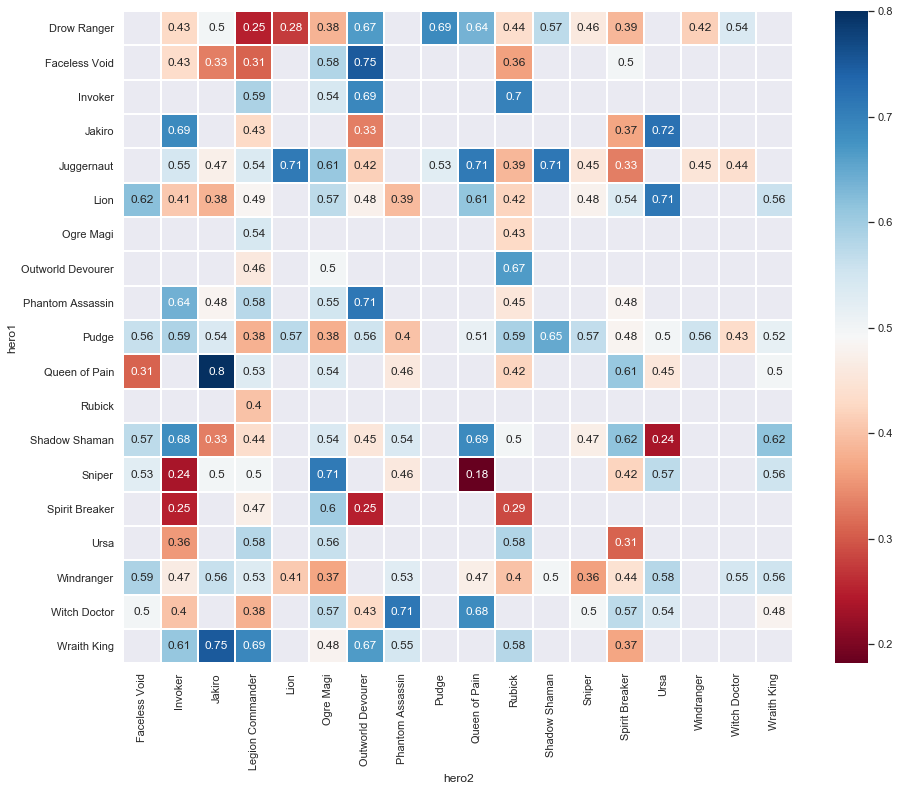

In [97]:
# Create top 20 hero pair heatmap - remove match sample size <= 20
top20_pair = hero_pair[(hero_pair['game_no']>10) & (hero_pair['hero1'].isin(top20_picks)) & (hero_pair['hero2'].isin(top20_picks))].sort_values(by='win_rate',ascending=False)
df_pivot = pd.pivot_table(top20_pair, values='win_rate', index='hero1', columns='hero2')
import seaborn as sns
from matplotlib import pyplot
sns.heatmap(df_pivot, cmap='RdBu',linewidth=1,annot=True,annot_kws={"size": 12});

In [75]:
df_pivot

hero2,Faceless Void,Invoker,Jakiro,Juggernaut,Legion Commander,Lion,Ogre Magi,Outworld Devourer,Phantom Assassin,Pudge,Queen of Pain,Rubick,Shadow Shaman,Sniper,Spirit Breaker,Ursa,Windranger,Witch Doctor,Wraith King
hero1,,,,,,,,,,,,,,,,,,,
Drow Ranger,1.000000,0.428571,0.500000,0.4,0.250000,0.275862,0.384615,0.666667,0.500000,0.687500,0.636364,0.437500,0.571429,0.461538,0.388889,0.375000,0.416667,0.538462,0.250000
Faceless Void,NaN,0.433333,0.333333,NaN,0.307692,NaN,0.583333,0.750000,1.000000,NaN,NaN,0.363636,NaN,NaN,0.500000,0.000000,NaN,NaN,0.333333
Invoker,NaN,NaN,NaN,NaN,0.588235,NaN,0.541667,0.692308,NaN,NaN,NaN,0.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jakiro,NaN,0.687500,NaN,NaN,0.428571,NaN,0.600000,0.333333,NaN,NaN,NaN,0.714286,NaN,NaN,0.368421,0.722222,NaN,NaN,NaN
Juggernaut,0.250000,0.545455,0.473684,NaN,0.535714,0.710526,0.608696,0.416667,0.400000,0.526316,0.708333,0.388889,0.714286,0.454545,0.333333,0.625000,0.450000,0.440000,0.750000
Lion,0.620690,0.407407,0.384615,NaN,0.485714,NaN,0.571429,0.476190,0.392857,NaN,0.612903,0.421053,0.400000,0.478261,0.535714,0.714286,NaN,0.500000,0.560000
Ogre Magi,NaN,NaN,NaN,NaN,0.542857,NaN,NaN,NaN,NaN,NaN,NaN,0.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outworld Devourer,NaN,NaN,NaN,NaN,0.458333,NaN,0.500000,NaN,NaN,NaN,NaN,0.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Phantom Assassin,NaN,0.640000,0.482759,NaN,0.576923,NaN,0.550000,0.714286,NaN,NaN,NaN,0.454545,NaN,NaN,0.481481,0.000000,NaN,NaN,NaN


In [600]:
df_hero.iloc[1,:30]
# ['hero_id','localized_name','roles']

id                                                                   2
name                                                 npc_dota_hero_axe
localized_name                                                     Axe
primary_attr                                                       str
attack_type                                                      Melee
roles                ['Initiator', 'Durable', 'Disabler', 'Jungler'...
img                      /apps/dota2/images/dota_react/heroes/axe.png?
icon                 /apps/dota2/images/dota_react/heroes/icons/axe...
base_health                                                        200
base_health_regen                                                 2.75
base_mana                                                           75
base_mana_regen                                                    0.0
base_armor                                                        -1.0
base_mr                                                             25
base_a